In [4]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
melissamonfared_spotify_tracks_attributes_and_popularity_path = kagglehub.dataset_download('melissamonfared/spotify-tracks-attributes-and-popularity')

print('Data source import complete.')

Data source import complete.


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

filterwarnings(action='ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-tracks-attributes-and-popularity/dataset.csv


In [6]:
df = pd.read_csv('/kaggle/input/spotify-tracks-attributes-and-popularity/dataset.csv')
df.head()

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

# Clean Data

In [8]:
df.isnull().sum()

,0
index,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [9]:
df.dropna(inplace=True)

In [10]:
df[df.duplicated()]

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


# EDA

## Popularity Analysis

In [11]:
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

## Genre Popularity

In [12]:
df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

,popularity
track_genre,
pop-film,59.283000
k-pop,56.952953
chill,53.651000
sad,52.379000
grunge,49.594000
...,...
chicago-house,12.339000
detroit-techno,11.174000
latin,8.297000


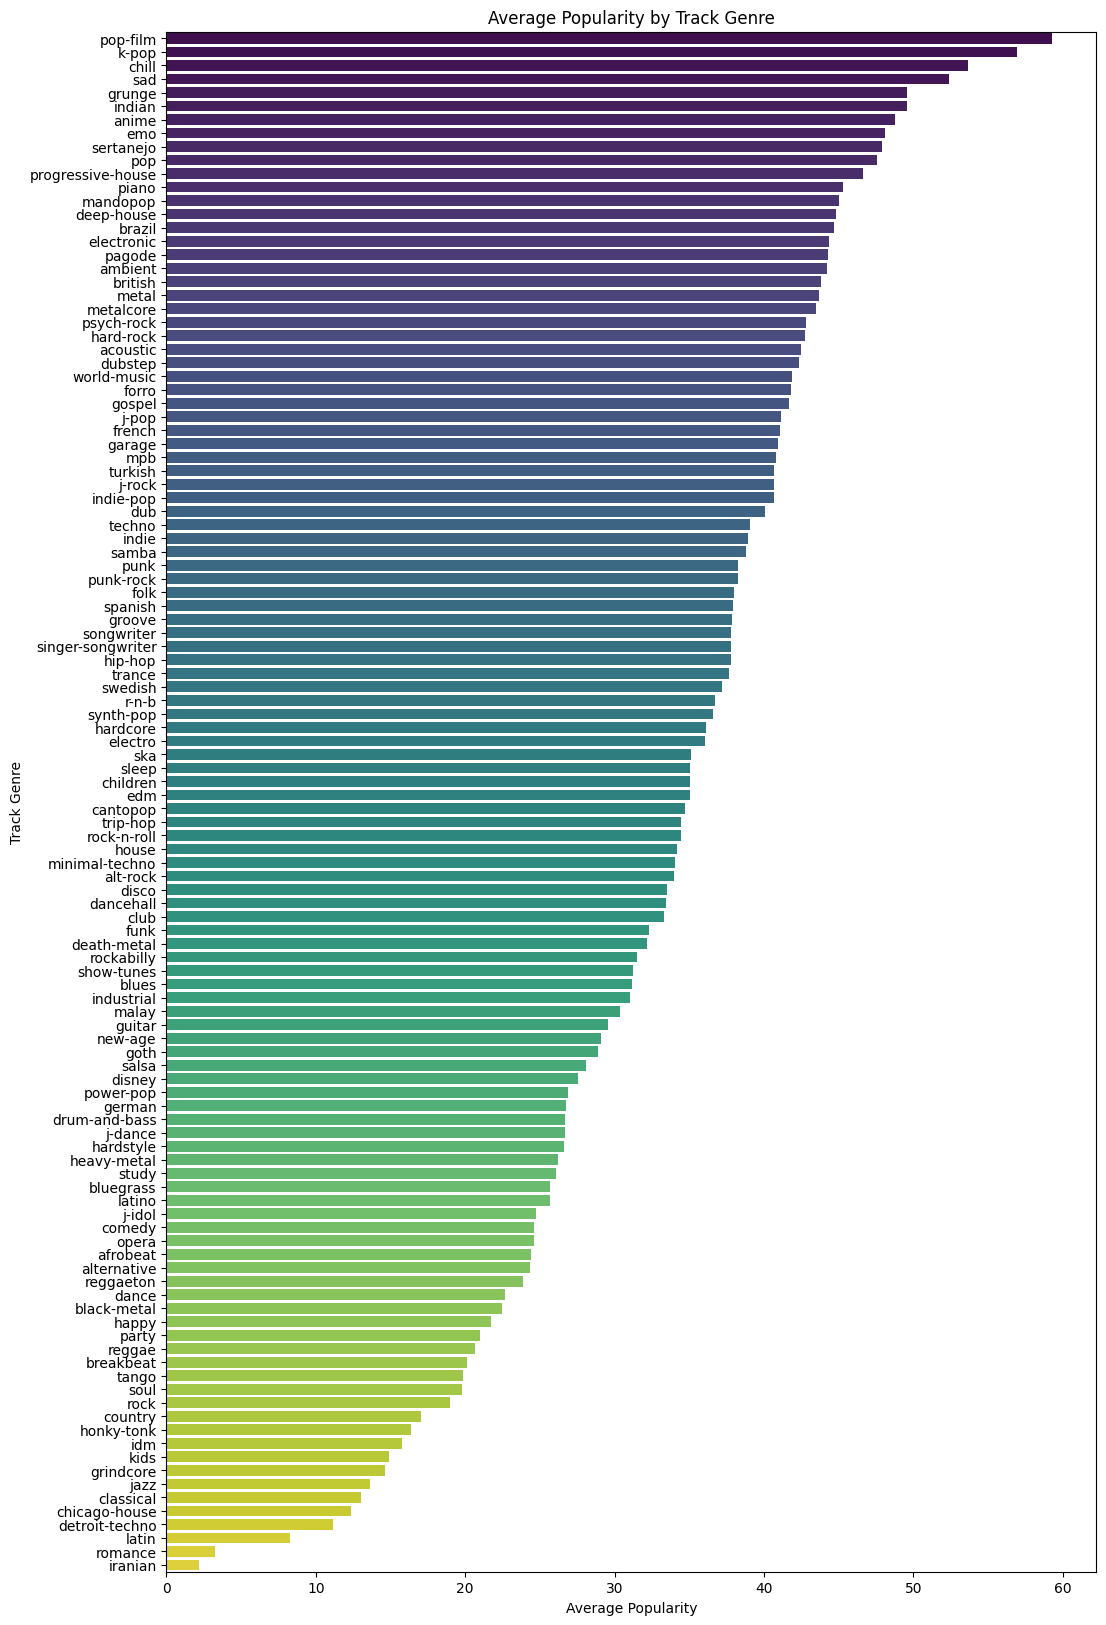

In [39]:
plt.figure(figsize=(12, 20))
sns.barplot(x='popularity', y='track_genre', data=df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).reset_index(), palette='viridis')
plt.title('Average Popularity by Track Genre')
plt.xlabel('Average Popularity')
plt.ylabel('Track Genre')
plt.show()

## Correlation Map of Popularity, Danceability, Energy, Instrumentalness, and Acousticness

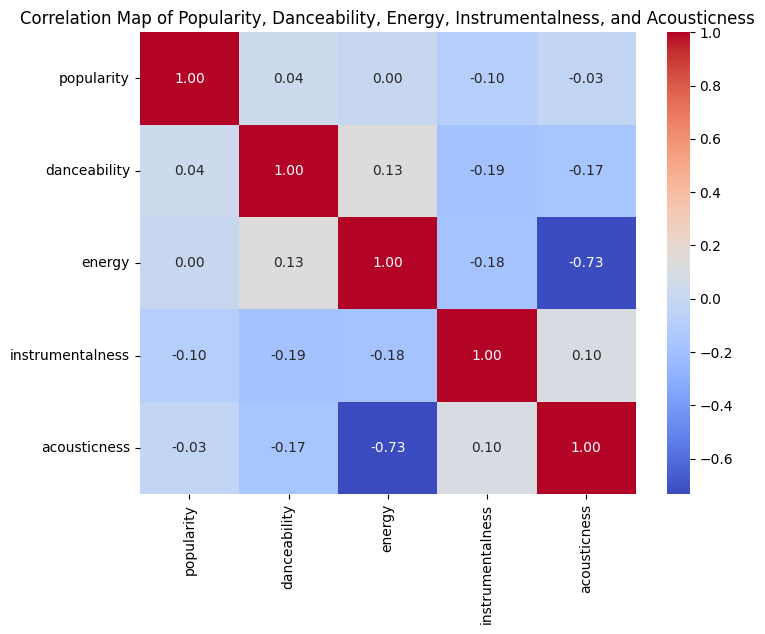

In [50]:
corr_data = df[['popularity', 'danceability', 'energy', 'instrumentalness', 'acousticness']]
correlation_matrix = corr_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map of Popularity, Danceability, Energy, Instrumentalness, and Acousticness')
plt.show()

## The Popularity of Explicit and Non-Explicit Song

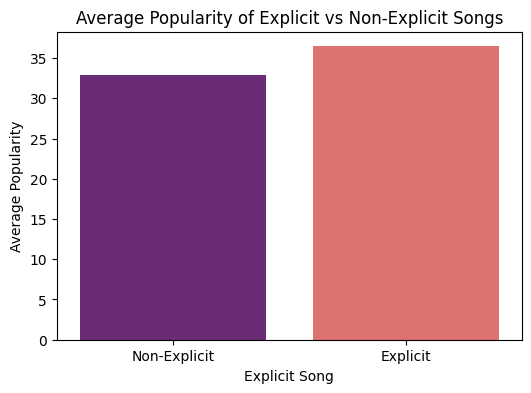

In [40]:
explicit_popularity = df.groupby('explicit')['popularity'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='explicit', y='popularity', data=explicit_popularity, palette='magma')
plt.title('Average Popularity of Explicit vs Non-Explicit Songs')
plt.xlabel('Explicit Song')
plt.ylabel('Average Popularity')
plt.xticks([0, 1], ['Non-Explicit', 'Explicit'])
plt.show()

## The Popularity of Slow, Moderate, and Fast Tempo Song

Text(0, 0.5, 'Average Popularity')

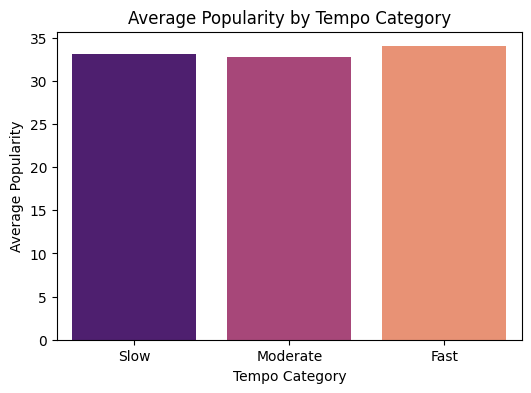

In [41]:
df['tempo_category'] = pd.cut(df['tempo'], bins=[0, 120, 140, float('inf')], labels=['Slow', 'Moderate', 'Fast'])
tempo_popularity = df.groupby('tempo_category')['popularity'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='tempo_category', y='popularity', data=tempo_popularity, palette='magma')
plt.title('Average Popularity by Tempo Category')
plt.xlabel('Tempo Category')
plt.ylabel('Average Popularity')

## The Popularity of Moderate and Loud Song

Text(0.5, 0, 'Loudness Category')

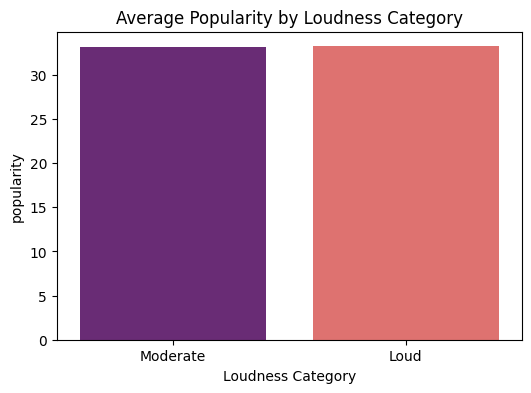

In [42]:
df['loudness_category'] = pd.cut(df['loudness'], bins=[-50, -40, float('inf')], labels=['Moderate', 'Loud'])
loudness_popularity = df.groupby('loudness_category')['popularity'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='loudness_category', y='popularity', data=loudness_popularity, palette='magma')
plt.title('Average Popularity by Loudness Category')
plt.xlabel('Loudness Category')

## The Popularity of Major and Minor Song

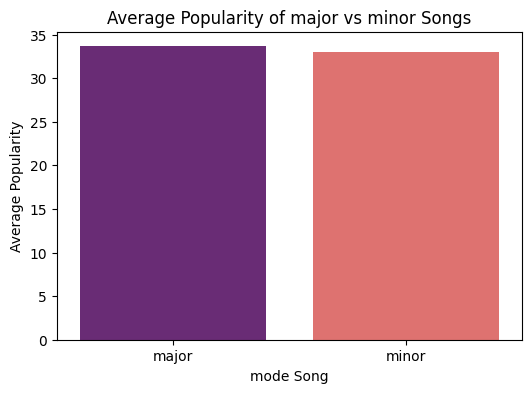

In [43]:
mode_popularity = df.groupby('mode')['popularity'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='mode', y='popularity', data=mode_popularity, palette='magma')
plt.title('Average Popularity of major vs minor Songs')
plt.xlabel('mode Song')
plt.ylabel('Average Popularity')
plt.xticks([0, 1], ['major', 'minor'])
plt.show()

# Insight

**Insight on Track Genre Popularity:**

Based on the analysis of average popularity by track genre, a significant variation exists across different music genres on Spotify. Genres such as "pop-film," "k-pop," "chill," "sad," and "grunge" exhibit notably higher average popularity. Conversely, genres like "iranian," "romance," "latin," "detroit-techno," and "chicago-house" show considerably lower average popularity. This indicates that track genre is a strong factor influencing a song's potential popularity.

**Insight from Correlation Map:**

Analyzing the correlation map of Popularity, Danceability, Energy, Instrumentalness, and Acousticness (from cell `5efaa7f0`), we observe the following:

*   **Popularity:** Popularity has a weak positive correlation with Danceability and Energy, and a weak negative correlation with Instrumentalness and Acousticness. This suggests that while there are slight trends, these specific audio features are not strong predictors of a song's popularity on their own.
*   **Energy and Acousticness:** There is a strong negative correlation between Energy and Acousticness. This is expected, as acoustically focused songs generally have lower energy levels.
*   **Danceability:** Danceability shows a weak positive correlation with Energy and a weak negative correlation with Instrumentalness and Acousticness.
*   **Instrumentalness:** Instrumentalness has a negative correlation with Danceability and Energy, and a positive correlation with Acousticness. This aligns with the nature of instrumental tracks often being less danceable and more acoustic.

Overall, while some relationships exist between these audio features, the correlation map indicates that popularity is not strongly driven by these individual factors alone. Other elements, such as genre (as seen in previous analysis), artist, or external factors, likely play a more significant role in a song's popularity.

**Insight on Explicit vs. Non-Explicit Song Popularity:**

Based on the bar plot of the average popularity of explicit vs. non-explicit songs (from cell `3e68cec6`), it appears that explicit songs have a slightly higher average popularity compared to non-explicit songs. However, the difference is not substantial, suggesting that the explicit nature of a song may have a minor influence on its popularity on Spotify. Other factors likely play a more significant role in determining a song's popularity.

**Insight on Tempo and Popularity:**

Based on the bar plot of average popularity by tempo category (from cell `tUJy1o9bphdR`), there isn't a significant difference in average popularity between songs categorized as Slow, Moderate, or Fast tempo. While Fast tempo songs show a slightly higher average popularity, the variation is not substantial enough to conclude that tempo is a major driver of popularity on its own.

**Insight on Loudness and Popularity:**

Analyzing the bar plot of average popularity by loudness category (from cell `Hp7HQkocqC-z`), we observe that both "Moderate" and "Loud" songs have very similar average popularity. This suggests that within the defined categories, loudness does not appear to have a strong impact on a song's popularity on Spotify.

**Insight on Mode and Popularity:**

From the bar plot of average popularity of major vs minor songs (from cell `F3GV8RJRqrQR`), there is a slight difference in average popularity between songs in major (mode 1) and minor (mode 0) keys, with major key songs having a slightly higher average popularity. However, this difference is relatively small, indicating that the mode of a song is not a primary factor influencing its popularity.